<div class="div_image pull-right">
    <div class = "image image_topic pull-right">
        <img src = "https://i.imgur.com/EGtMXKh.jpg?1">
    </div>
</div>

# <b>Capstone Project: Predicting Dota 2 Match Wins using Machine Learning and Recommender System (Data Modelling)</b>


In part 2, we did some data cleaning and EDA. In this section, we will first be modelling our data using traditional modeling techniques to determine if we are able to predict win rates based on machine learning algorithms.


# Importing Libraries


In [2]:
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import CSV data

model_df = pd.read_csv("Data\preprocessed_data.csv")

model_df.shape


(77994, 247)

# Data Preprocessing


First, we need to map our Boolean values to binary values in order to feed into our machine learning models.


In [4]:
# Mapping 0 to False (radiant_loss) and 1 for True (radiant_win)
model_df['radiant_win'] = model_df['radiant_win'].map({False: 0, True: 1})


In [5]:
# Rearrange column order
sequence = ['radiant_win', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19',  'R20', 'R21', 'R22', 'R23', 'R25', 'R26', 'R27', 'R28', 'R29',  'R30', 'R31', 'R32', 'R33', 'R34', 'R35', 'R36', 'R37', 'R38', 'R39',  'R40', 'R41', 'R42', 'R43', 'R44', 'R45', 'R46', 'R47', 'R48', 'R49',  'R50', 'R51', 'R52', 'R53', 'R54', 'R55', 'R56', 'R57', 'R58', 'R59',  'R60', 'R61', 'R62', 'R63', 'R64', 'R65', 'R66', 'R67', 'R68', 'R69', 'R70', 'R71', 'R72', 'R73', 'R74', 'R75', 'R76', 'R77', 'R78', 'R79', 'R80', 'R81', 'R82', 'R83', 'R84', 'R85', 'R86', 'R87', 'R88', 'R89', 'R90', 'R91', 'R92', 'R93', 'R94', 'R95', 'R96', 'R97', 'R98', 'R99', 'R100', 'R101', 'R102', 'R103', 'R104', 'R105', 'R106', 'R107', 'R108', 'R109', 'R110', 'R111', 'R112', 'R113', 'R114', 'R119', 'R120', 'R121', 'R123', 'R126', 'R128', 'R129', 'R135',
            'R136', 'R137', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',  'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69', 'D70', 'D71', 'D72', 'D73', 'D74', 'D75', 'D76', 'D77', 'D78', 'D79', 'D80', 'D81', 'D82', 'D83', 'D84', 'D85', 'D86', 'D87', 'D88', 'D89', 'D90', 'D91', 'D92', 'D93', 'D94', 'D95', 'D96', 'D97', 'D98', 'D99', 'D100', 'D101', 'D102', 'D103', 'D104', 'D105', 'D106', 'D107', 'D108', 'D109', 'D110', 'D111', 'D112', 'D113', 'D114', 'D119', 'D120', 'D121', 'D123', 'D126', 'D128', 'D129', 'D135', 'D136', 'D137', ]

model_df = model_df.reindex(columns=sequence)

model_df.head()


,radiant_win,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R25,R26,R27,R28,R29,R30,R31,R32,R33,R34,R35,R36,R37,R38,R39,R40,R41,R42,R43,R44,R45,R46,R47,R48,R49,R50,R51,R52,R53,R54,R55,R56,R57,R58,R59,R60,R61,R62,R63,R64,R65,R66,R67,R68,R69,R70,R71,R72,R73,R74,R75,R76,R77,R78,R79,R80,R81,R82,R83,R84,R85,R86,R87,R88,R89,R90,R91,R92,R93,R94,R95,R96,R97,R98,R99,R100,R101,R102,R103,R104,R105,R106,R107,R108,R109,R110,R111,R112,R113,R114,R119,R120,R121,R123,R126,R128,R129,R135,R136,R137,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,D101,D102,D103,D104,D105,D106,D107,D108,D109,D110,D111,D112,D113,D114,D119,D120,D121,D123,D126,D128,D129,D135,D136,D137
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
# Save to csv

model_df.to_csv('Data\processed_data.csv', index = False)


## Generate Holdout Set

We will set aside 5% of our data as a holdout set that our model can use to predict on once trained and validated.


In [7]:
# Create Holdout set

data = model_df.sample(frac=0.95, random_state=42)
data_unseen = model_df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (74094, 247)
Unseen Data For Predictions: (3900, 247)


From here, we see that we have kept 4119 rows of data as our holdout set. We will then train on our training set.


## Generate Validation Set

In [8]:
# Train Test Split Data
X = data.drop("radiant_win", axis=1)
y = data["radiant_win"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2)


In [9]:
# Value count of each label
y_train.value_counts(normalize=True)


0    0.51116
1    0.48884
Name: radiant_win, dtype: float64

As there may be some team compositions that are found in Team Dire but not in Team Radiant, we reverse map our values where the dire team is now the radiant team. This will also give us more data for our machine learning model to work with.

In [10]:
# Reverse Mapping our data

X_train_copy = X_train.replace({0:1, 1:0})
y_train_copy = y_train.replace({0:1, 1:0})

X_train = pd.concat([X_train, X_train_copy])
y_train = pd.concat([y_train, y_train_copy])

In [11]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: radiant_win, dtype: float64

In [13]:
# Saving our data
np.savez_compressed('Data\data.npz', X_train=X_train, y_train=y_train,
         X_test=X_test, y_test=y_test, data_unseen=data_unseen)


We will be using the pycaret library to help us test on several classification models.


In [15]:
# Creating our training set

pycaret = pd.concat([X_train, y_train], axis=1)


In [16]:
# Creating numeric columns to feed into our machine learning algorithm
numeric_columns = (pycaret.columns)[:-1].tolist()


In [17]:
# Setup our pycaret parameters

model1 = setup(data=pycaret, target='radiant_win', session_id=123,
               use_gpu=True, fold=5, numeric_features=numeric_columns)


,Description,Value
0,session_id,123
1,Target,radiant_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(118550, 247)"
5,Missing Values,False
6,Numeric Features,246
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


I've decided to go with <b>Accuracy</b> as the main comparison metric as the target variable dataset is balanced, and that there is no major downside if our model predicts the match victory incorrectly.


In [18]:
# Compare the model performance
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.5693,0.5980,0.5653,0.5692,0.5672,0.1386,0.1386,6.6420
lda,Linear Discriminant Analysis,0.5609,0.5864,0.5578,0.5606,0.5592,0.1217,0.1217,2.2580
ridge,Ridge Classifier,0.5608,0.0000,0.5577,0.5605,0.5591,0.1217,0.1217,0.2880
lr,Logistic Regression,0.5607,0.5864,0.5575,0.5605,0.5590,0.1215,0.1215,1.0840
lightgbm,Light Gradient Boosting Machine,0.5518,0.5708,0.5472,0.5516,0.5493,0.1036,0.1036,3.1400
svm,SVM - Linear Kernel,0.5485,0.0000,0.4599,0.5611,0.4903,0.0967,0.1020,3.1500
gbc,Gradient Boosting Classifier,0.5462,0.5658,0.5360,0.5464,0.5411,0.0923,0.0924,31.9620
ada,Ada Boost Classifier,0.5454,0.5639,0.5400,0.5452,0.5426,0.0908,0.0908,8.2020
xgboost,Extreme Gradient Boosting,0.5415,0.5603,0.5382,0.5410,0.5396,0.0830,0.0830,2.3240
rf,Random Forest Classifier,0.5352,0.5489,0.5081,0.5365,0.5219,0.0704,0.0704,11.8060


As seen from the table above, the catboost classifer model gives us the best accuracy. However, the performance is poor, with only a 56.9% accuracy. This is only ~6.9% better than our dummy classifier of 50.0%, which is our base model. This indicates that at first glance, hero selection only plays a small role in a match victory.

To continue, we will tune our model to first see if the are any improvements in our accuracy score.


In [19]:
model_catboost = create_model('catboost', return_train_score = True)

In [20]:
tuned_model_catboost = tune_model(model_catboost, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5541,0.5788,0.5558,0.5532,0.5545,0.1083,0.1083
1,0.5565,0.5814,0.5436,0.5573,0.5503,0.1131,0.1131
2,0.5559,0.5784,0.5538,0.5555,0.5546,0.1119,0.1119
3,0.5558,0.5794,0.5575,0.5549,0.5562,0.1115,0.1115
4,0.5596,0.5787,0.5515,0.5598,0.5557,0.1192,0.1192
Mean,0.5564,0.5793,0.5524,0.5561,0.5543,0.1128,0.1128
Std,0.0018,0.0011,0.0049,0.0023,0.0021,0.0036,0.0036


In [21]:
model_lda = create_model('lda', return_train_score= True)

In [22]:
tuned_model_lda = tune_model(model_lda, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5597,0.5878,0.5641,0.5585,0.5613,0.1195,0.1195
1,0.5659,0.5894,0.5496,0.5673,0.5583,0.1317,0.1318
2,0.5587,0.5845,0.5579,0.5581,0.5580,0.1173,0.1173
3,0.5605,0.5873,0.5621,0.5596,0.5608,0.1209,0.1209
4,0.5595,0.5830,0.5553,0.5593,0.5573,0.1191,0.1191
Mean,0.5609,0.5864,0.5578,0.5606,0.5591,0.1217,0.1217
Std,0.0026,0.0023,0.0051,0.0034,0.0016,0.0051,0.0052


In [23]:
model_ridge = create_model('ridge', return_train_score=True)


In [24]:
tuned_model_ridge = tune_model(model_ridge, choose_better=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5594,0.0000,0.5734,0.5570,0.5651,0.1188,0.1188
1,0.5655,0.0000,0.5580,0.5657,0.5618,0.1309,0.1309
2,0.5588,0.0000,0.5647,0.5575,0.5611,0.1177,0.1177
3,0.5609,0.0000,0.5717,0.5589,0.5653,0.1218,0.1218
4,0.5605,0.0000,0.5637,0.5594,0.5616,0.1210,0.1210
Mean,0.5610,0.0000,0.5663,0.5597,0.5630,0.1220,0.1221
Std,0.0023,0.0000,0.0056,0.0031,0.0018,0.0047,0.0047


From tuning, we see that accuracy score did not improve significantly.

We will then plot the confusion matrix to take at the False Positives and Negatives.


In [25]:
blended_model = blend_models([tuned_model_lda, tuned_model_ridge, tuned_model_catboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5601,0.0000,0.5673,0.5585,0.5629,0.1202,0.1202
1,0.5649,0.0000,0.5526,0.5658,0.5591,0.1298,0.1298
2,0.5593,0.0000,0.5628,0.5582,0.5605,0.1186,0.1186
3,0.5614,0.0000,0.5672,0.5601,0.5636,0.1229,0.1229
4,0.5606,0.0000,0.5596,0.5600,0.5598,0.1211,0.1211
Mean,0.5613,0.0000,0.5619,0.5605,0.5612,0.1225,0.1225
Std,0.0020,0.0000,0.0055,0.0027,0.0017,0.0039,0.0039


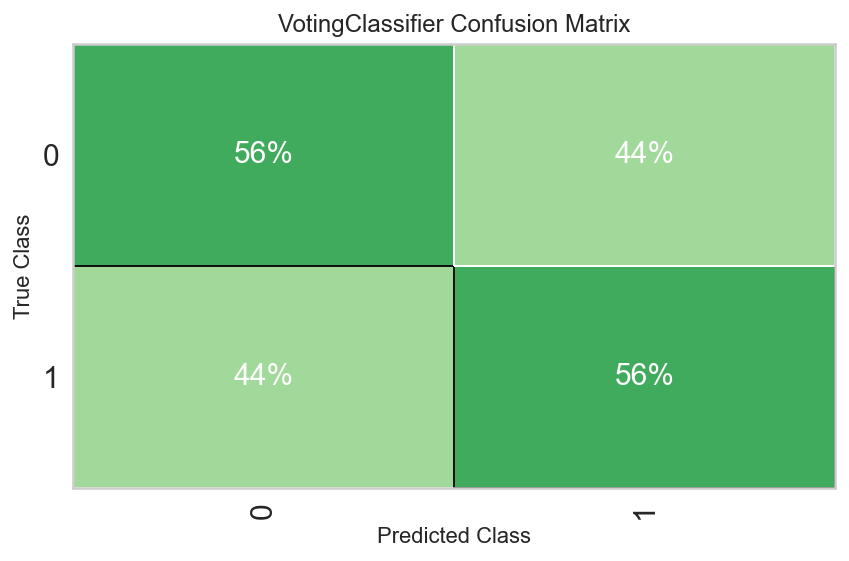

In [26]:
# Plot confusion matrix percentage
plot_model(blended_model, plot='confusion_matrix',
           plot_kwargs={'percent': True}, scale=2)


From the confusion matrix, we see that we have a 44% false negative score, and a 44% false positive score.


We would use the model to predict on our validation dataset.


In [27]:
# Predicting model on our train dataset
predict_model(blended_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5602,0.5602,0.5632,0.5615,0.5624,0.1204,0.1204


,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,D121,D123,D126,D128,D129,D135,D136,D137,radiant_win,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
35562,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
35563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
35564,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1


In [28]:
# Predicting model on our test dataset
final_model = finalize_model(blended_model)

test_data = pd.concat([X_test, y_test], axis=1)

predictions = predict_model(final_model, raw_score=True, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5522,0.5519,0.5012,0.5548,0.5266,0.1038,0.1043


Our validation set scored 55.2%., which is slightly lesser than our training accuracy.

# Summary of insights

Our model on our test dataset shows slightly better results. This could be because we trained our model on the full dataset instead. The dismal accuracy is to be expected as Dota 2 is a complex game that has many other winning factors beyond hero selection, such as items used as team synergy.  We could however look to see if more complex models would grant us better accuracy measures.

One limitation of the current models is that they only take into account each individual hero on its own and that each hero is independent from each other's opponent or teammate. This however fails to capture the synergies between heroes and how teams can be strengthened when paired up with certain heroes. Conversely, this can also apply to opponents where matches against certain heroes are poor as certain heroes may counter other heroes strengths.

To take into account the cooperative and competitive synergies that are present in the game, we will build a neural network model to see if this will help us predict the match wins better.
